In [2]:
!pip install --upgrade numpy pandas


In [3]:
!pip uninstall numpy pandas -y
!pip install numpy pandas


Found existing installation: numpy 2.2.1
Uninstalling numpy-2.2.1:
  Successfully uninstalled numpy-2.2.1
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
  Using cached numpy-2.2.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached numpy-2.2.1-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 2.4.2 requires pandas==1.5.3, but you have pandas 2.2.3 which is incompatible.


importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## reading csv file using read_csv() in-built function

In [5]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


checking no of columns and no of rows in the dataset

In [6]:
dataset.shape   # checking rows and columns

(1156, 7)

checking the null values and data types 

In [7]:
dataset.info()   # checking null  values in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Preprocesing

As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword. You can try something else too.

In [8]:
dataset['PURPOSE'].fillna("NOT",inplace=True)

C:\Users\potth\AppData\Local\Temp\ipykernel_17588\1252251071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT",inplace=True)


Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

In [9]:
dataset['START_DATE']=pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE']=pd.to_datetime(dataset['END_DATE'],errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [10]:
from datetime import datetime
dataset['date']=pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time']=pd.DatetimeIndex(dataset['START_DATE']).hour


#changing into categories of day and night
dataset['day_night']=pd.cut(x=dataset['time'],
                            bins=[0,10,15,19,24],
                            labels=['Morning','Afternoon','Evening','Night'])

Once we are done with creating new columns, we can now drop rows with null values.

In [11]:
dataset.dropna(inplace=True)

It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

In [12]:
dataset.drop_duplicates(inplace=True)

## Data Visualization

In this section, we will try to understand and compare all columns.

Let’s start with checking the unique values in dataset of the columns with object datatype.

In [13]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col]=dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

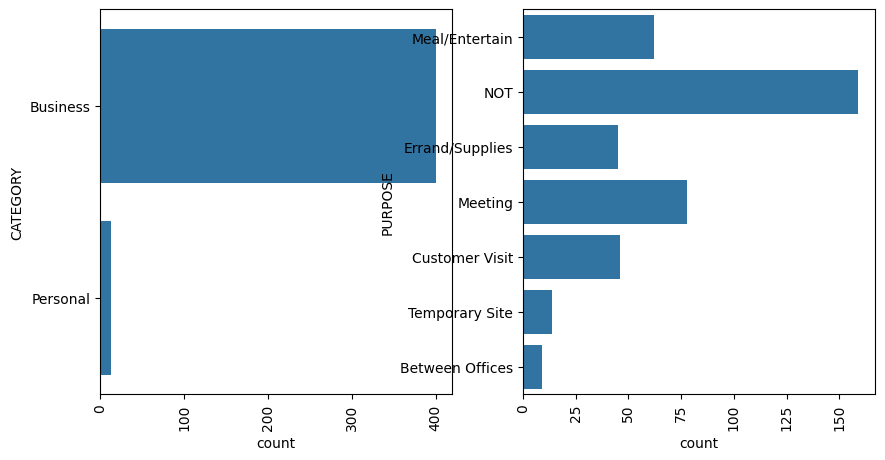

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

Let’s do the same for time column, here we will be using the time column which we have extracted above.

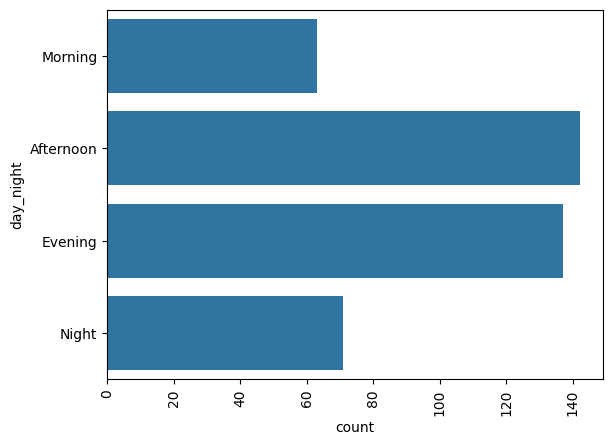

In [ ]:
sns.countplot(dataset['day_night'])
plt.xticks(rotation = 90)

Now, we will be comparing the two different categories along with the PURPOSE of the user

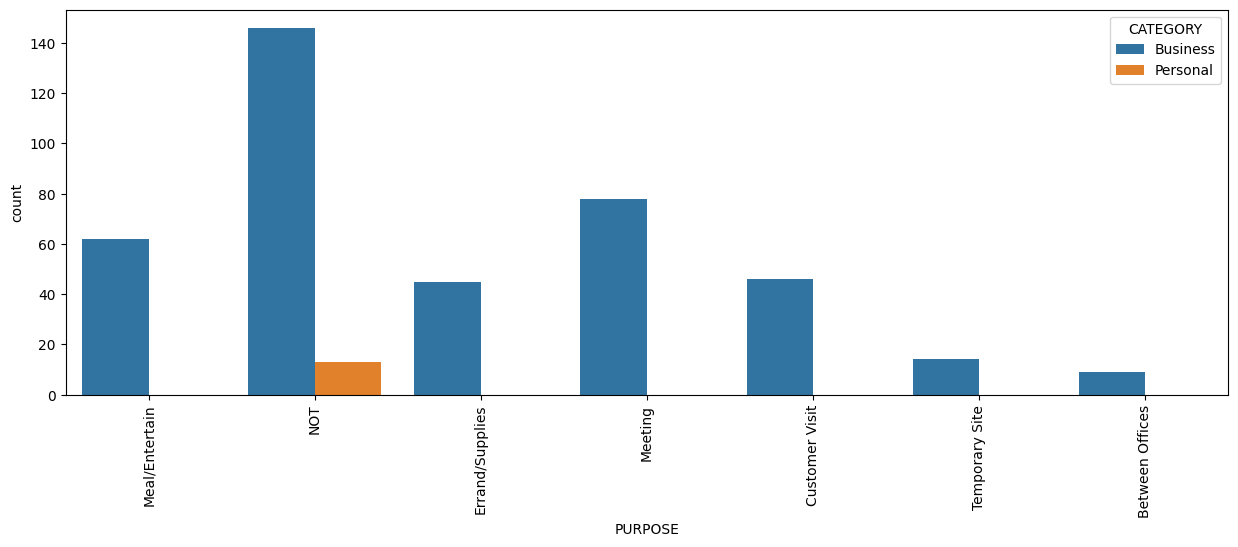

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

Insights from the above count-plots : 
Most of the rides are booked for business purpose.
Most of the people book cabs for Meetings and Meal / Entertain purpose.
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).
As we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.

In [28]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [30]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.
